# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск. #


**1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.**

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=1000, 
                                              n_features = 2, 
                                              n_informative = 2, 
                                              n_targets = 1, 
                                              noise = 5, 
                                              coef = True, 
                                              random_state = 5)



In [3]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [4]:
# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e6

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

In [5]:
# возьмем нулевые начальные веса
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# счетчик итераций
iter_num = 0

# список значений ошибок после каждой итерации
errors = []

# зададим начальную разницу весов большим числом
weight_dist = np.inf

In [6]:
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 25.3975


In [7]:
# возьмем нулевые начальные веса
w_s = np.zeros(2)

# счетчик итераций
iter_num = 0

# список векторов весов после каждой итерации
w_list_s = [w_s.copy()]

# список значений ошибок после каждой итерации
errors_s = []

# зададим начальную разницу весов большим числом
weight_dist = np.inf

In [8]:

# ход стохастического градиентного спуска

while weight_dist > min_weight_dist and iter_num < max_iter:
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0])
    
    new_w = w_s - 2 * eta * np.dot(X[train_ind].T, (np.dot(X[train_ind], w_s) - Y[train_ind])) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w_s, ord=2)
    
    w_list_s.append(new_w.copy())
    errors_s.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w_s = new_w
    
w_list_s = np.array(w_list_s)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_s[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 1026.5859


Text(0, 0.5, 'MSE')

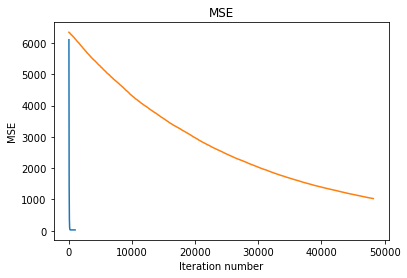

In [9]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.plot(range(len(errors_s)), errors_s)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

**Вывод:**

In [10]:
print(f'Скорость сходимости при использовании градиентного спуска составляет {len(errors)}, а скорость сходимости при использовании стохастического градиентного спуска {len(errors_s)}, что превосходит первое значение в {len(errors_s) // len(errors)} раза. ')

Скорость сходимости при использовании градиентного спуска составляет 981, а скорость сходимости при использовании стохастического градиентного спуска 48204, что превосходит первое значение в 49 раза. 


**2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.**

In [23]:
# возьмем нулевые начальные веса
w_s2 = np.zeros(2)

# счетчик итераций
iter_num = 0

# список векторов весов после каждой итерации
w_list_s2 = [w_s2.copy()]

# список значений ошибок после каждой итерации
errors_s2 = []

# зададим начальную разницу весов большим числом
weight_dist = np.inf

#зададим значение lambda
lambda_=1e-7

In [24]:
# ход стохастического градиентного спуска с L2-регуляризацей

while weight_dist > min_weight_dist and iter_num < max_iter:
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0])
    
    new_w = w_s2 - eta * (2 * np.dot(X[train_ind].T, (np.dot(X[train_ind], w_s2) - Y[train_ind])) / Y.shape[0] + lambda_ * w_s2)
    
    weight_dist = np.linalg.norm(new_w - w_s2, ord=2)
    
    w_list_s2.append(new_w.copy())
    errors_s2.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w_s2 = new_w
    
w_list_s2 = np.array(w_list_s2)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_s2[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 26.1525


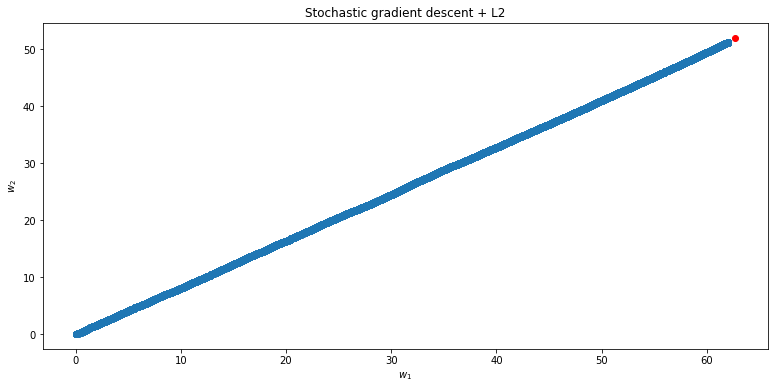

In [26]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent + L2')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_s2[:, 0], w_list_s2[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list_s2[:, 0], w_list_s2[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

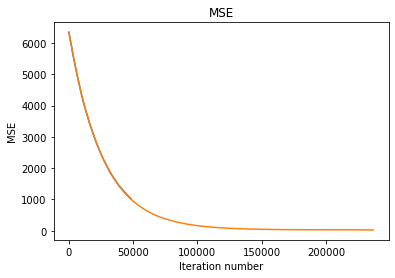

In [28]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_s)), errors_s)
plt.plot(range(len(errors_s2)), errors_s2)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

**Вывод**

In [36]:
print(f'Скорость сходимости при использовании стохастического градиентного спуска без L2 регуляризации составляет {len(errors_s)}, а скорость сходимости при использовании стохастического градиентного спуска с L2 регуляризацией {len(errors_s2)}, что превосходит первое значение в {len(errors_s2) // len(errors_s)} раза. При этом значение MSE в первом случае {errors_s[-1]} и во втором {errors_s2[-1]} показывает, что использование L2 регуляризации, при одинаковых значениях гипер параметров, существенно снижает размер ошибки')

Скорость сходимости при использовании стохастического градиентного спуска без L2 регуляризации составляет 48204, а скорость сходимости при использовании стохастического градиентного спуска с L2 регуляризацией 236760, что превосходит первое значение в 4 раза. При этом значение MSE в первом случае 1026.585857851936 и во втором 26.152519193530043 показывает, что использование L2 регуляризации, при одинаковых значениях гипер параметров, существенно снижает размер ошибки
